In [1]:
import json
import pytz
from datetime import datetime
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.finance as fina
from matplotlib.dates import date2num

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def time_convert(dt, local="utc"):
    utc = pytz.utc
    tokyo = pytz.timezone('Asia/Tokyo')
    if local == "utc":
        dt_utc = utc.localize(dt)
        return tokyo.normalize(dt_utc.astimezone(tokyo))
    else:
        return tokyo.localize(dt)

In [3]:
def value_generator(dict_value):
    date_before = dict_value[0]["exec_date"][:16]
    price = dict_value[0]["price"]
    opening, high, low = price, price, price
    for i in dict_value:
        date = i["exec_date"][:16]
        price = i["price"]
        if date_before == date:
            high = max(high, price)
            low = min(low, price)
            closing = price
        else:
            yield date2num(datetime.strptime(date, '%Y-%m-%dT%H:%M')), opening, high, low, closing
            time = date
            opening, high, low = price, price, price
        date_before = date

In [4]:
f = open('excution.txt', 'r')
value_list = json.load(f)
quotes = list(value_generator(value_list))

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


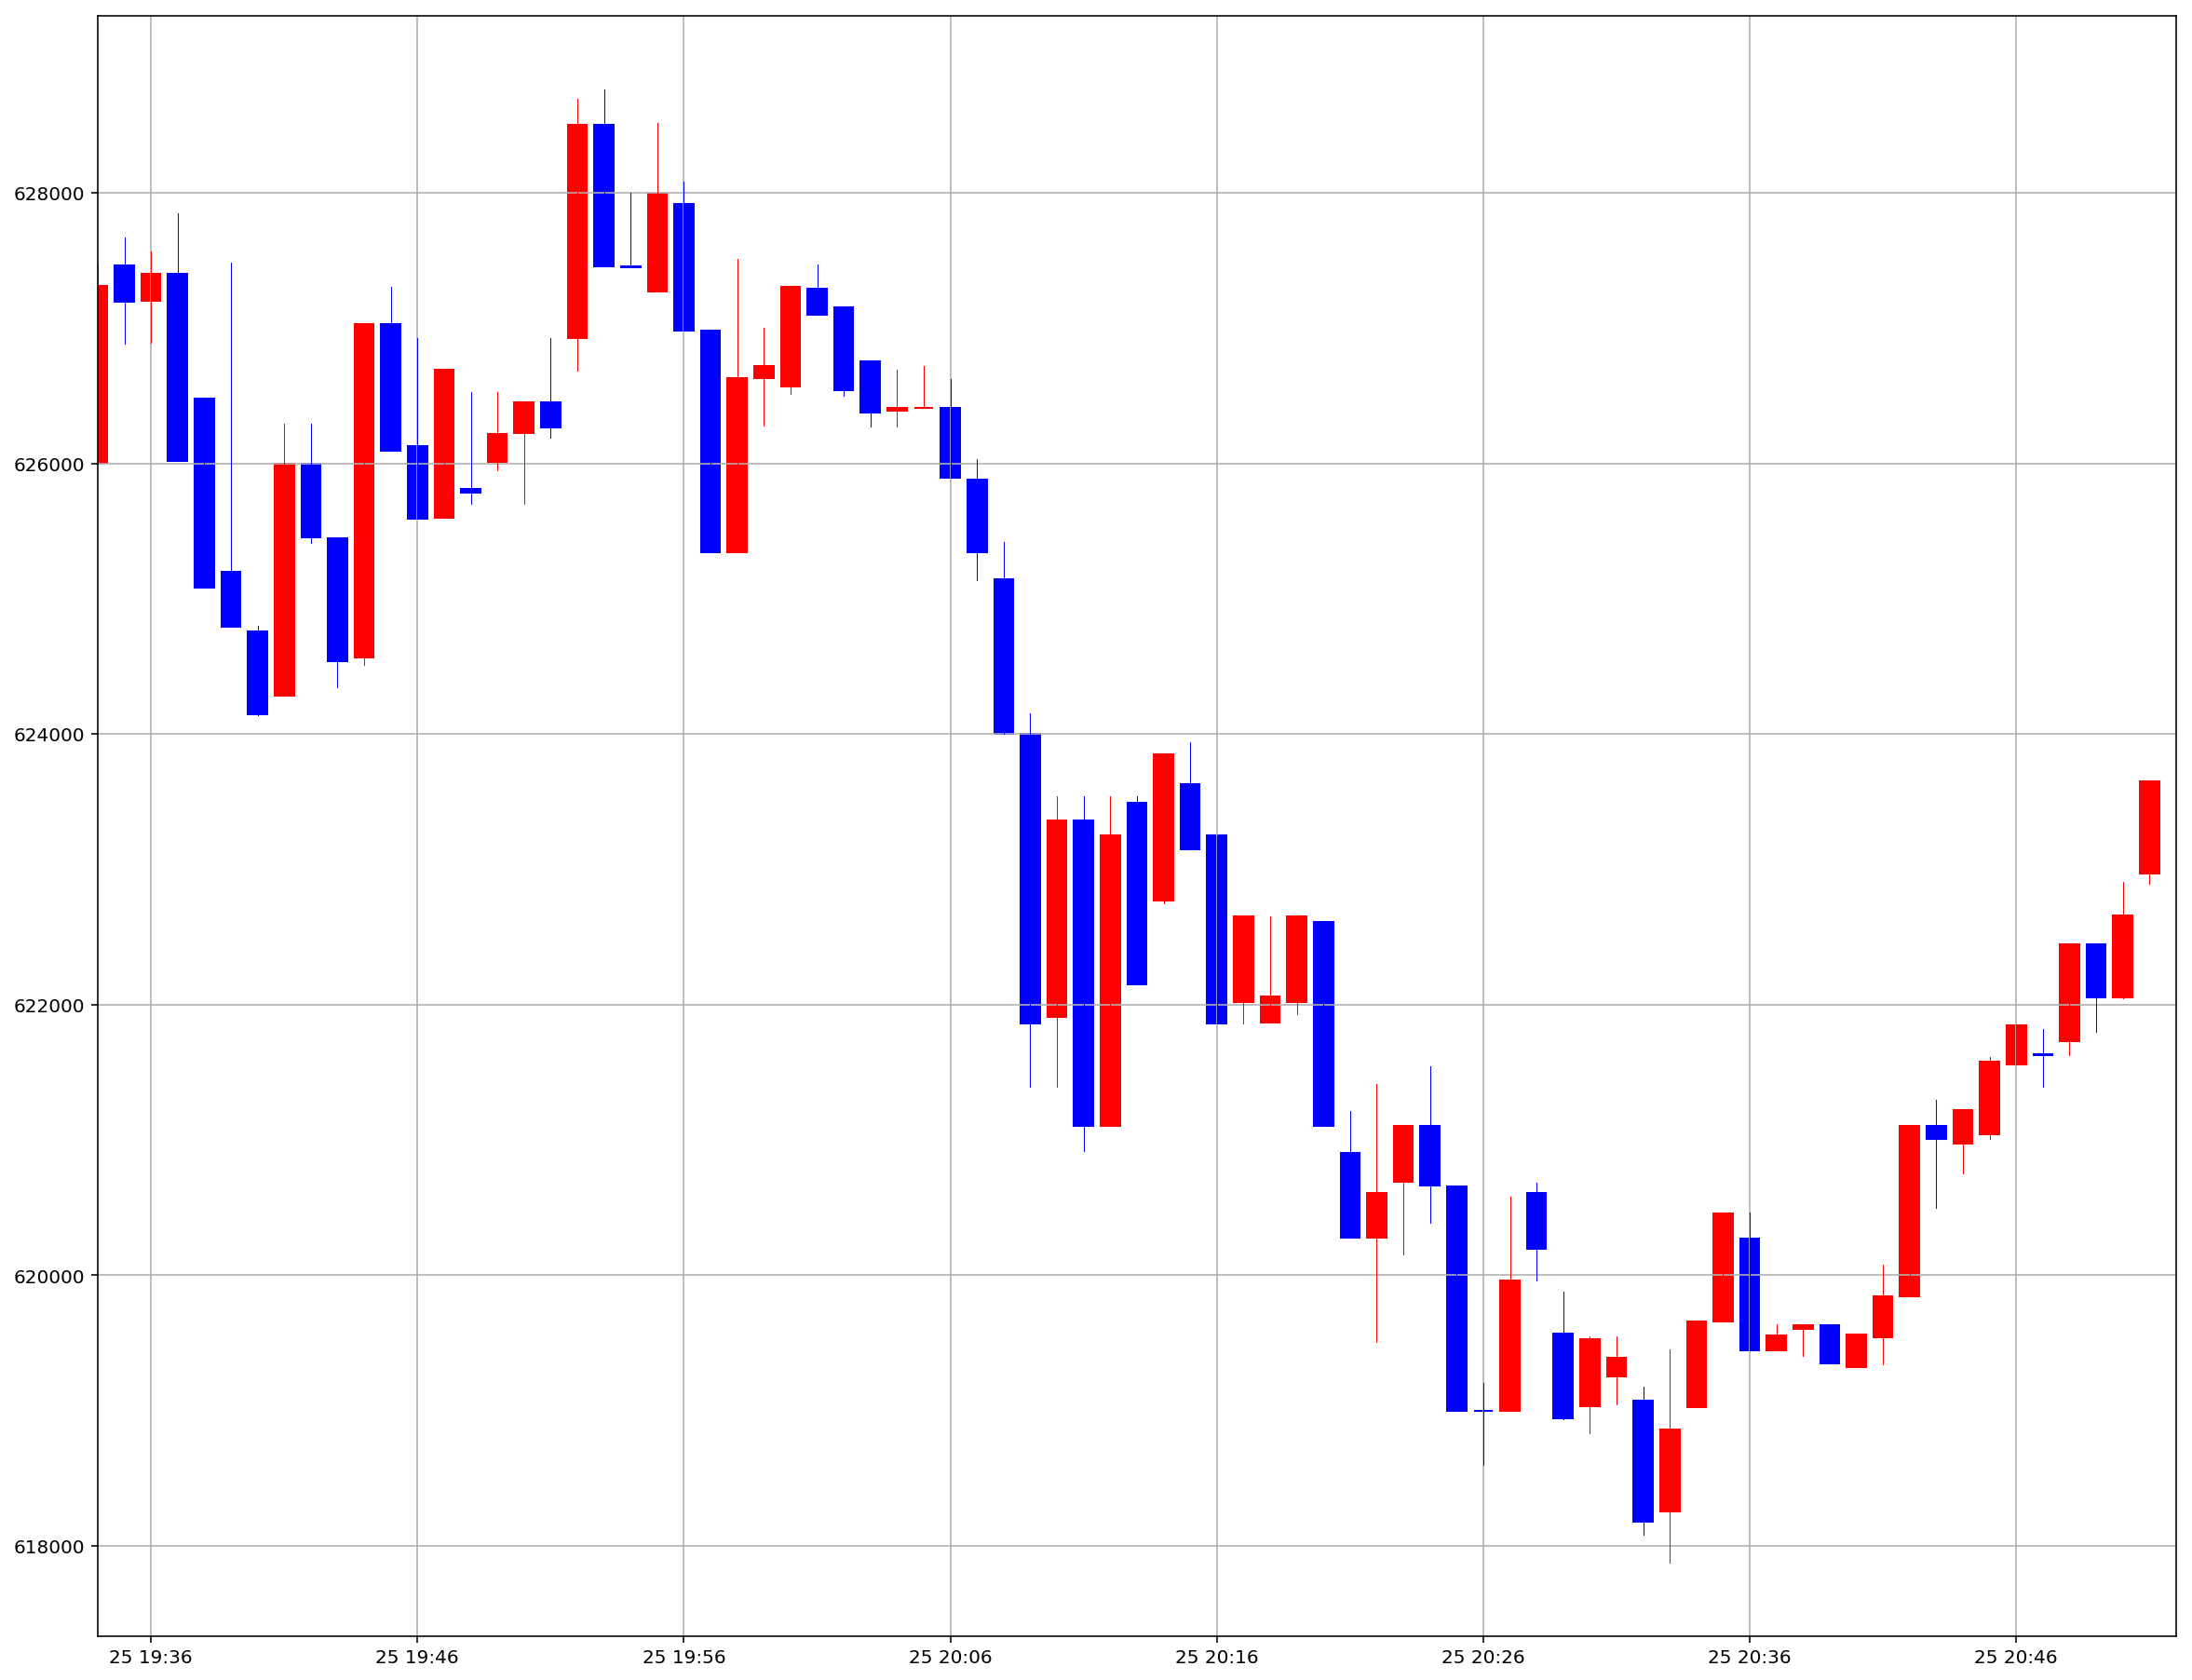

In [5]:
fig = plt.figure(figsize=(20, 16))
ax = plt.subplot()
ax.grid()

# x_start_tokyo = datetime.strptime("2017-10-25 20:00", "%Y-%m-%d %H:%M")
# x_end_tokyo = datetime.strptime("2017-10-25 20:30", "%Y-%m-%d %H:%M")
# x_start = time_convert(x_start_tokyo, "tokyo")
# x_end = time_convert(x_end_tokyo, "tokyo")

x_start_utc = datetime.strptime(value_list[-1]["exec_date"][:16], '%Y-%m-%dT%H:%M')
x_end_utc = datetime.strptime(value_list[0]["exec_date"][:16], '%Y-%m-%dT%H:%M')
x_start = time_convert(x_start_utc)
x_end = time_convert(x_end_utc)

fina.candlestick_ohlc(ax, quotes, width=0.0005, colorup='b', colordown='r', alpha=1)

ax.set_xlim(x_start, x_end)

fig.show()